# 빅데이터언어 2차과제
* 이 름: 김 형 석
* 학 번: 2017203053
* 학 과: 소프트웨어학부
* 수업시간: 월6수5

## 1) 입력 받은 해당지역 일일 확진자 수 시각화

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read csv file and encode to read korean
df=pd.read_csv('covid.csv',encoding='CP949')
df

,날짜,지역,확진자수
0,2020.03.02,서울,87
1,2020.03.02,부산,83
2,2020.03.02,대구,2704
3,2020.03.02,인천,6
4,2020.03.02,광주,9
...,...,...,...
4653,2020.11.30,전북,334
4654,2020.11.30,전남,424
4655,2020.11.30,경북,1704
4656,2020.11.30,경남,625


In [3]:
# check the datas
df.head()

,날짜,지역,확진자수
0,2020.03.02,서울,87
1,2020.03.02,부산,83
2,2020.03.02,대구,2704
3,2020.03.02,인천,6
4,2020.03.02,광주,9


In [4]:
df.shape

(4658, 3)

In [5]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [6]:
df.columns

Index(['날짜', '지역', '확진자수'], dtype='object')

In [7]:
df.describe()

,확진자수
count,4658.000000
mean,910.866037
std,1852.766434
min,1.000000
25%,51.250000
50%,156.000000
75%,609.500000
max,8811.000000


In [8]:
# input area to draw plot
area=input()
result=df[df['지역']==area]
result

경기


,날짜,지역,확진자수
8,2020.03.02,경기,89
25,2020.03.03,경기,94
42,2020.03.04,경기,101
59,2020.03.05,경기,110
76,2020.03.06,경기,120
...,...,...,...
4581,2020.11.26,경기,6864
4598,2020.11.27,경기,6981
4615,2020.11.28,경기,7107
4632,2020.11.29,경기,7207


In [9]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [10]:
help(plt.rc)

Help on function rc in module matplotlib.pyplot:

rc(group, **kwargs)
    Set the current `.rcParams`.  *group* is the grouping for the rc, e.g.,
    for ``lines.linewidth`` the group is ``lines``, for
    ``axes.facecolor``, the group is ``axes``, and so on.  Group may
    also be a list or tuple of group names, e.g., (*xtick*, *ytick*).
    *kwargs* is a dictionary attribute name/value pairs, e.g.,::
    
      rc('lines', linewidth=2, color='r')
    
    sets the current `.rcParams` and is equivalent to::
    
      rcParams['lines.linewidth'] = 2
      rcParams['lines.color'] = 'r'
    
    The following aliases are available to save typing for interactive users:
    
    =====   =================
    Alias   Property
    =====   =================
    'lw'    'linewidth'
    'ls'    'linestyle'
    'c'     'color'
    'fc'    'facecolor'
    'ec'    'edgecolor'
    'mew'   'markeredgewidth'
    'aa'    'antialiased'
    =====   =================
    
    Thus you could abbreviate t

In [11]:
# 일일확진자 수(오늘 - 전날 확진자 수)를 계산하기 위해 전날에 해당하는 확진자수 값을 담는 새로운 열(확진자수2)를 추가
result['확진자수2']=0
result['확진자수2'][1:]=result['확진자수'][:-1]

result['일일확진자수']=result['확진자수']-result['확진자수2']
result


C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\2345668104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['확진자수2']=0
C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\2345668104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['확진자수2'][1:]=result['확진자수'][:-1]
C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\2345668104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,날짜,지역,확진자수,확진자수2,일일확진자수
8,2020.03.02,경기,89,0,89
25,2020.03.03,경기,94,89,5
42,2020.03.04,경기,101,94,7
59,2020.03.05,경기,110,101,9
76,2020.03.06,경기,120,110,10
...,...,...,...,...,...
4581,2020.11.26,경기,6864,6681,183
4598,2020.11.27,경기,6981,6864,117
4615,2020.11.28,경기,7107,6981,126
4632,2020.11.29,경기,7207,7107,100


In [12]:
# 과제의 결과 값에 첫 번째 값 기준이 0이므로 첫 날 일일확진자수를 0으로 설정
result.loc[result['날짜']=='2020.03.02','일일확진자수']=0

In [13]:
result

,날짜,지역,확진자수,확진자수2,일일확진자수
8,2020.03.02,경기,89,0,0
25,2020.03.03,경기,94,89,5
42,2020.03.04,경기,101,94,7
59,2020.03.05,경기,110,101,9
76,2020.03.06,경기,120,110,10
...,...,...,...,...,...
4581,2020.11.26,경기,6864,6681,183
4598,2020.11.27,경기,6981,6864,117
4615,2020.11.28,경기,7107,6981,126
4632,2020.11.29,경기,7207,7107,100


([<matplotlib.axis.XTick at 0x2171a2f2730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

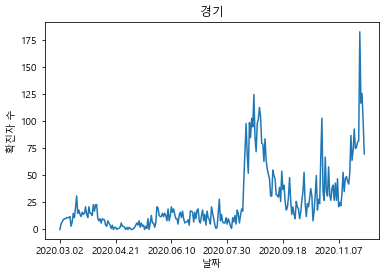

In [14]:
plt.rc('font',family='Malgun Gothic') # 한글 깨짐 방지를 위해  font 설정
plt.title(area) # plot title
plt.plot(result['날짜'],result['일일확진자수']) # graph 그리기
plt.xlabel("날짜") # 가로 축 이름
plt.ylabel("확진자 수") # 세로 축 이름
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07']) # 가로 축 눈금 지정

## 2) 입력 받은 지역의 일일 증감률 시각화

In [15]:
df

,날짜,지역,확진자수
0,2020.03.02,서울,87
1,2020.03.02,부산,83
2,2020.03.02,대구,2704
3,2020.03.02,인천,6
4,2020.03.02,광주,9
...,...,...,...
4653,2020.11.30,전북,334
4654,2020.11.30,전남,424
4655,2020.11.30,경북,1704
4656,2020.11.30,경남,625


In [16]:
# input area to draw plot
area=input()
result=df[df['지역']==area]
result

충남


,날짜,지역,확진자수
11,2020.03.02,충남,68
28,2020.03.03,충남,81
45,2020.03.04,충남,82
62,2020.03.05,충남,86
79,2020.03.06,충남,90
...,...,...,...
4584,2020.11.26,충남,833
4601,2020.11.27,충남,864
4618,2020.11.28,충남,881
4635,2020.11.29,충남,894


In [17]:
# 1번과 동일하게 일일확진자 수 열 추가
result['확진자수2']=0
result['확진자수2'][1:]=result['확진자수'][:-1]

result['일일확진자수']=result['확진자수']-result['확진자수2']
result

C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\3019290378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['확진자수2']=0
C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\3019290378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['확진자수2'][1:]=result['확진자수'][:-1]
C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\3019290378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,날짜,지역,확진자수,확진자수2,일일확진자수
11,2020.03.02,충남,68,0,68
28,2020.03.03,충남,81,68,13
45,2020.03.04,충남,82,81,1
62,2020.03.05,충남,86,82,4
79,2020.03.06,충남,90,86,4
...,...,...,...,...,...
4584,2020.11.26,충남,833,817,16
4601,2020.11.27,충남,864,833,31
4618,2020.11.28,충남,881,864,17
4635,2020.11.29,충남,894,881,13


In [18]:
# 증감률 열 추가 후 0으로 초기화
result['증감률']=0
result.loc[result['날짜']=='2020.03.02','일일확진자수']=0

C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\3827145859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['증감률']=0


In [19]:
result

,날짜,지역,확진자수,확진자수2,일일확진자수,증감률
11,2020.03.02,충남,68,0,0,0
28,2020.03.03,충남,81,68,13,0
45,2020.03.04,충남,82,81,1,0
62,2020.03.05,충남,86,82,4,0
79,2020.03.06,충남,90,86,4,0
...,...,...,...,...,...,...
4584,2020.11.26,충남,833,817,16,0
4601,2020.11.27,충남,864,833,31,0
4618,2020.11.28,충남,881,864,17,0
4635,2020.11.29,충남,894,881,13,0


In [20]:
# 증감률 계산 (오늘 일일확진자수 / 전날까지 누적확진자 수)*100
for i in range(1,len(result)):
    result.iloc[i,5]=result.iloc[i,4]/result.iloc[i,3]*100
result

C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\596757331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.iloc[i,5]=result.iloc[i,4]/result.iloc[i,3]*100


,날짜,지역,확진자수,확진자수2,일일확진자수,증감률
11,2020.03.02,충남,68,0,0,0.000000
28,2020.03.03,충남,81,68,13,19.117647
45,2020.03.04,충남,82,81,1,1.234568
62,2020.03.05,충남,86,82,4,4.878049
79,2020.03.06,충남,90,86,4,4.651163
...,...,...,...,...,...,...
4584,2020.11.26,충남,833,817,16,1.958384
4601,2020.11.27,충남,864,833,31,3.721489
4618,2020.11.28,충남,881,864,17,1.967593
4635,2020.11.29,충남,894,881,13,1.475596


([<matplotlib.axis.XTick at 0x2171b5b86a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

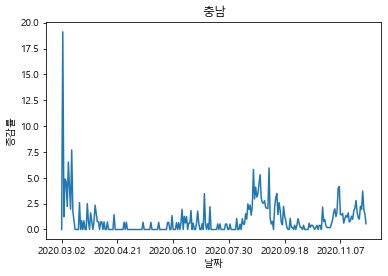

In [21]:
# plot 그리기 1번과 동일
plt.rc('font',family='Malgun Gothic')
plt.title(area)
plt.plot(result['날짜'],result['증감률'])
plt.xlabel("날짜")
plt.ylabel("증감률")
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07'])

## 3) 지역 일일 확진자 수가 가장 많은 지역 3곳 시각화(입력 지역 x)

In [22]:
df

,날짜,지역,확진자수
0,2020.03.02,서울,87
1,2020.03.02,부산,83
2,2020.03.02,대구,2704
3,2020.03.02,인천,6
4,2020.03.02,광주,9
...,...,...,...
4653,2020.11.30,전북,334
4654,2020.11.30,전남,424
4655,2020.11.30,경북,1704
4656,2020.11.30,경남,625


In [23]:
# data 원본 보호를 위해 새로운 변수에 deep copy 
result=df.copy()

In [24]:
result

,날짜,지역,확진자수
0,2020.03.02,서울,87
1,2020.03.02,부산,83
2,2020.03.02,대구,2704
3,2020.03.02,인천,6
4,2020.03.02,광주,9
...,...,...,...
4653,2020.11.30,전북,334
4654,2020.11.30,전남,424
4655,2020.11.30,경북,1704
4656,2020.11.30,경남,625


In [25]:
result['일일확진자수']=0
result

,날짜,지역,확진자수,일일확진자수
0,2020.03.02,서울,87,0
1,2020.03.02,부산,83,0
2,2020.03.02,대구,2704,0
3,2020.03.02,인천,6,0
4,2020.03.02,광주,9,0
...,...,...,...,...
4653,2020.11.30,전북,334,0
4654,2020.11.30,전남,424,0
4655,2020.11.30,경북,1704,0
4656,2020.11.30,경남,625,0


In [26]:
result=result.sort_values(by=['지역','날짜'])

In [27]:
result['확진자수2']=0
result['확진자수2'][1:]=result['확진자수'][:-1]
result

C:\Users\Oculus\AppData\Local\Temp\ipykernel_7008\1142576887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['확진자수2'][1:]=result['확진자수'][:-1]


,날짜,지역,확진자수,일일확진자수,확진자수2
9,2020.03.02,강원,15,0,0
26,2020.03.03,강원,20,0,15
43,2020.03.04,강원,21,0,20
60,2020.03.05,강원,23,0,21
77,2020.03.06,강원,25,0,23
...,...,...,...,...,...
4583,2020.11.26,충북,239,0,231
4600,2020.11.27,충북,259,0,239
4617,2020.11.28,충북,283,0,259
4634,2020.11.29,충북,306,0,283


In [28]:
result.loc[result['날짜']=='2020.03.02','확진자수2']=0
result

,날짜,지역,확진자수,일일확진자수,확진자수2
9,2020.03.02,강원,15,0,0
26,2020.03.03,강원,20,0,15
43,2020.03.04,강원,21,0,20
60,2020.03.05,강원,23,0,21
77,2020.03.06,강원,25,0,23
...,...,...,...,...,...
4583,2020.11.26,충북,239,0,231
4600,2020.11.27,충북,259,0,239
4617,2020.11.28,충북,283,0,259
4634,2020.11.29,충북,306,0,283


In [29]:
result['일일확진자수']=result['확진자수']-result['확진자수2']
result

,날짜,지역,확진자수,일일확진자수,확진자수2
9,2020.03.02,강원,15,15,0
26,2020.03.03,강원,20,5,15
43,2020.03.04,강원,21,1,20
60,2020.03.05,강원,23,2,21
77,2020.03.06,강원,25,2,23
...,...,...,...,...,...
4583,2020.11.26,충북,239,8,231
4600,2020.11.27,충북,259,20,239
4617,2020.11.28,충북,283,24,259
4634,2020.11.29,충북,306,23,283


In [30]:
# 각 지역의 첫 날 일일확진자수 0으로 설정
result.loc[result['날짜']=='2020.03.02','일일확진자수']=0
result

,날짜,지역,확진자수,일일확진자수,확진자수2
9,2020.03.02,강원,15,0,0
26,2020.03.03,강원,20,5,15
43,2020.03.04,강원,21,1,20
60,2020.03.05,강원,23,2,21
77,2020.03.06,강원,25,2,23
...,...,...,...,...,...
4583,2020.11.26,충북,239,8,231
4600,2020.11.27,충북,259,20,239
4617,2020.11.28,충북,283,24,259
4634,2020.11.29,충북,306,23,283


In [31]:
# 일일확진자수가 많은 순서대로 Top 3를 고르기 위해 정렬
result=result.sort_values(by='일일확진자수',ascending=False)
result

,날짜,지역,확진자수,일일확진자수,확진자수2
19,2020.03.03,대구,3600,896,2704
36,2020.03.04,대구,4006,406,3600
87,2020.03.07,대구,5084,390,4694
70,2020.03.06,대구,4694,367,4327
53,2020.03.05,대구,4327,321,4006
...,...,...,...,...,...
141,2020.03.10,대전,18,-1,19
120,2020.03.09,부산,96,-1,97
52,2020.03.05,부산,92,-1,93
2067,2020.07.01,충북,64,-1,65


In [32]:
# 정렬 후 unique() 로 지역 값을 확인하면 일일 확진자가 많은 순서대로 저장되어있다.
result['지역'].unique()

array(['대구', '서울', '경기', '경북', '인천', '부산', '강원', '경남', '광주', '충남', '전남',
       '충북', '전북', '세종', '대전', '울산', '제주'], dtype=object)

In [33]:
# Top 3 지역 선택
answer=[]
for area in result['지역'].unique()[:3]:
    answer.append(result[result['지역']==area])
answer[0]['지역'].unique()

array(['대구'], dtype=object)

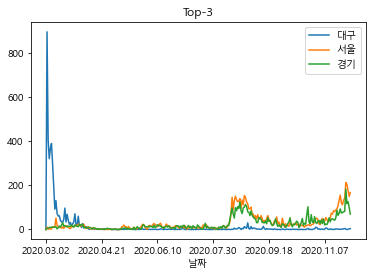

In [34]:
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('Top-3')

for i in answer:
    i=i.sort_values(by='날짜') # 시간 순서대로 plot을 그리기 위해 다시 날짜 오름차순으로 정렬
    label=i['지역'].unique()[0] # legend를 표시하기 위해 list 안에 문자열로 저장되어 있는 값을 추출 
    plt.plot(i['날짜'],i['일일확진자수'], label=label)
plt.xlabel("날짜")
plt.xticks(['2020.03.02','2020.04.21','2020.06.10','2020.07.30','2020.09.18','2020.11.07'])
plt.legend()